In [1]:
from job_shop_lib import JobShopInstance, Operation
from job_shop_lib.graphs import JobShopGraph
from job_shop_lib.visualization import plot_disjunctive_graph

CPU = 0
GPU = 1
DATA_CENTER = 2

job_1 = [Operation(CPU, 1), Operation(GPU, 1), Operation(DATA_CENTER, 7)]
job_2 = [Operation(GPU, 5), Operation(DATA_CENTER, 1), Operation(CPU, 1)]
job_3 = [Operation(DATA_CENTER, 1), Operation(CPU, 3), Operation(GPU, 2)]

jobs = [job_1, job_2, job_3]

instance = JobShopInstance(jobs, name="Example")

In [2]:
graph = JobShopGraph(instance)

In [3]:
graph.add_source_sink_nodes()

In [4]:
graph.nodes_by_type

defaultdict(list,
            {<NodeType.OPERATION: 1>: [Node(node_type=OPERATION, value=O(m=0, d=1, j=0, p=0), id=0),
              Node(node_type=OPERATION, value=O(m=1, d=1, j=0, p=1), id=1),
              Node(node_type=OPERATION, value=O(m=2, d=7, j=0, p=2), id=2),
              Node(node_type=OPERATION, value=O(m=1, d=5, j=1, p=0), id=3),
              Node(node_type=OPERATION, value=O(m=2, d=1, j=1, p=1), id=4),
              Node(node_type=OPERATION, value=O(m=0, d=1, j=1, p=2), id=5),
              Node(node_type=OPERATION, value=O(m=2, d=1, j=2, p=0), id=6),
              Node(node_type=OPERATION, value=O(m=0, d=3, j=2, p=1), id=7),
              Node(node_type=OPERATION, value=O(m=1, d=2, j=2, p=2), id=8)],
             <NodeType.SOURCE: 4>: [Node(node_type=SOURCE, value=None, id=9)],
             <NodeType.SINK: 5>: [Node(node_type=SINK, value=None, id=10)]})

In [5]:
graph.nodes_by_machine

[[Node(node_type=OPERATION, value=O(m=0, d=1, j=0, p=0), id=0),
  Node(node_type=OPERATION, value=O(m=0, d=1, j=1, p=2), id=5),
  Node(node_type=OPERATION, value=O(m=0, d=3, j=2, p=1), id=7)],
 [Node(node_type=OPERATION, value=O(m=1, d=1, j=0, p=1), id=1),
  Node(node_type=OPERATION, value=O(m=1, d=5, j=1, p=0), id=3),
  Node(node_type=OPERATION, value=O(m=1, d=2, j=2, p=2), id=8)],
 [Node(node_type=OPERATION, value=O(m=2, d=7, j=0, p=2), id=2),
  Node(node_type=OPERATION, value=O(m=2, d=1, j=1, p=1), id=4),
  Node(node_type=OPERATION, value=O(m=2, d=1, j=2, p=0), id=6)]]

In [6]:
graph.nodes_by_job

[[Node(node_type=OPERATION, value=O(m=0, d=1, j=0, p=0), id=0),
  Node(node_type=OPERATION, value=O(m=1, d=1, j=0, p=1), id=1),
  Node(node_type=OPERATION, value=O(m=2, d=7, j=0, p=2), id=2)],
 [Node(node_type=OPERATION, value=O(m=1, d=5, j=1, p=0), id=3),
  Node(node_type=OPERATION, value=O(m=2, d=1, j=1, p=1), id=4),
  Node(node_type=OPERATION, value=O(m=0, d=1, j=1, p=2), id=5)],
 [Node(node_type=OPERATION, value=O(m=2, d=1, j=2, p=0), id=6),
  Node(node_type=OPERATION, value=O(m=0, d=3, j=2, p=1), id=7),
  Node(node_type=OPERATION, value=O(m=1, d=2, j=2, p=2), id=8)]]

In [7]:
graph.add_conjunctive_edges()
graph.add_disjunctive_edges()
graph.add_source_sink_edges()

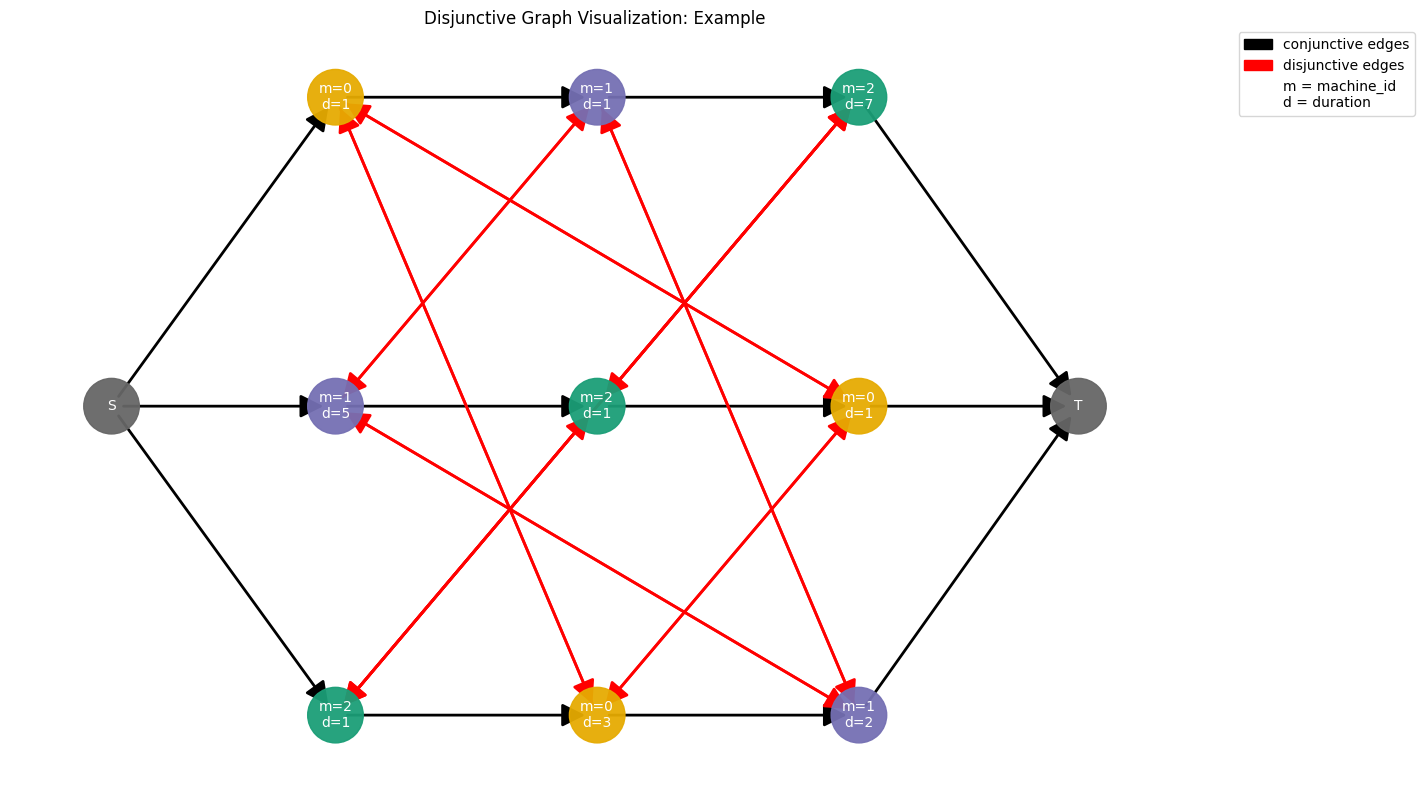

In [8]:
_ = plot_disjunctive_graph(graph)

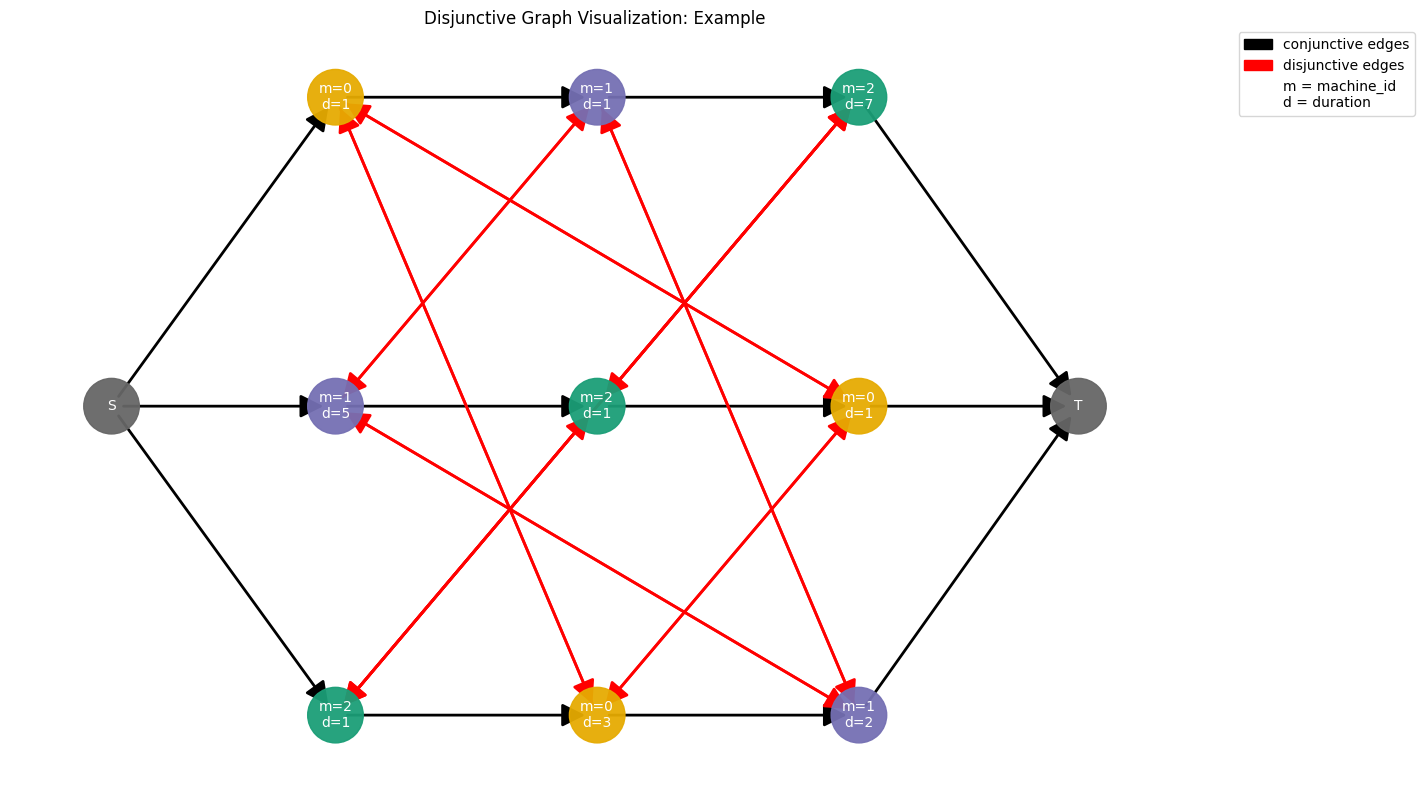

In [15]:
disjunctive_graph = JobShopGraph.build_disjunctive_graph(instance)
_ = plot_disjunctive_graph(disjunctive_graph)

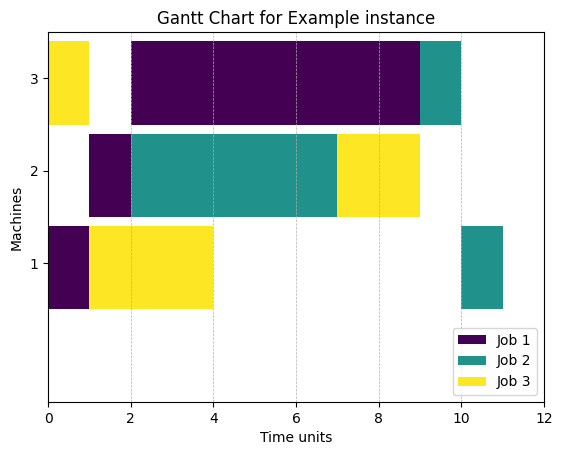

In [1]:
import matplotlib.pyplot as plt

from job_shop_lib import JobShopInstance, Operation
from job_shop_lib.solvers import CPSolver
from job_shop_lib.visualization import plot_gantt_chart, plot_disjunctive_graph
from job_shop_lib.graphs import JobShopGraph

MACHINE_1 = 0
MACHINE_2 = 1
MACHINE_3 = 2

job_1 = [
    Operation(MACHINE_1, 1),
    Operation(MACHINE_2, 1),
    Operation(MACHINE_3, 7),
]
job_2 = [
    Operation(MACHINE_2, 5),
    Operation(MACHINE_3, 1),
    Operation(MACHINE_1, 1),
]
job_3 = [
    Operation(MACHINE_3, 1),
    Operation(MACHINE_1, 3),
    Operation(MACHINE_2, 2),
]

jobs = [job_1, job_2, job_3]

instance = JobShopInstance(jobs, name="Example")

cp_sat_solver = CPSolver()
schedule = cp_sat_solver(instance)

fig, ax = plot_gantt_chart(schedule)
plt.show()

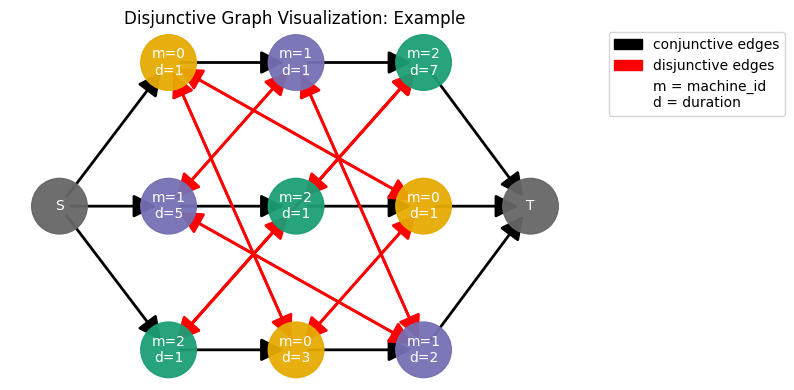

In [2]:
disjunctive_graph = JobShopGraph.build_disjunctive_graph(instance)
plot_disjunctive_graph(disjunctive_graph, figsize=(6, 4))
plt.show()